#**Nama : Nur Rahma Diah**<br>
#**Nim : 211351107**<br>
#**Kelas : Malam A**<br>

# **Import Databaset**

In [6]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip pima-indians-diabetes-database.zip -d pima-indians-diabetes-database
!ls pima-indians-diabetes-database

Archive:  pima-indians-diabetes-database.zip
replace pima-indians-diabetes-database/diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: diabetes.csv


# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score , train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.metrics import classification_report
from scipy import stats
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold

import pickle
import warnings
warnings.filterwarnings("ignore")
import xgboost as xg
%matplotlib inline


ModuleNotFoundError: No module named 'pandas'

# **Data Discovery**

In [ ]:
df = pd.read_csv('pima-indians-diabetes-database/diabetes.csv')

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.isna().sum().sort_values(ascending = False).head(5)

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
dtype: int64

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [ ]:
df.corr()['Outcome']

NameError: name 'df' is not defined

In [ ]:
for column in (df.drop(columns = 'Outcome').columns):
    replace_with_thresholds(df, column)
    print(column, check_outlier(df, column))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


In [ ]:
def check_data(df):
    print(80 * "*")
    print('DIMENSION: ({}, {})'.format(df.shape[0], df.shape[1]))
    print(80 * "*")
    print("COLUMNS:\n")
    print(df.columns.values)
    print(80 * "*")
    print("DATA INFO:\n")
    print(df.dtypes)
    print(80 * "*")
    print("MISSING VALUES:\n")
    print(df.isnull().sum())
    print(80 * "*")
    print("NUMBER OF UNIQUE VALUES:\n")
    print(df.nunique())

check_data(df)

********************************************************************************
DIMENSION: (768, 9)
********************************************************************************
COLUMNS:

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
********************************************************************************
DATA INFO:

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object
********************************************************************************
MISSING VALUES:

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
B

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(" RESULT ".center(50, "-"))
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print("".center(50, "-"))

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

--------------------- RESULT ---------------------
Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
--------------------------------------------------


In [ ]:
df.describe().T

count        mean        std     min       25%  \
Pregnancies               768.0    3.837240   3.344157   0.000   1.00000   
Glucose                   763.0  121.686763  30.535641  44.000  99.00000   
BloodPressure             733.0   72.375171  11.973207  40.000  64.00000   
SkinThickness             541.0   29.059150  10.057253   7.000  22.00000   
Insulin                   394.0  146.500000  90.348842  14.000  76.25000   
BMI                       757.0   32.394716   6.715793  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.458914   0.285596   0.078   0.24375   
Age                       768.0   33.199870  11.628404  21.000  24.00000   
Outcome                   768.0    0.348958   0.476951   0.000   0.00000   

                               50%        75%      max  
Pregnancies                 3.0000    6.00000   13.500  
Glucose                   117.0000  141.00000  199.000  
BloodPressure              72.0000   80.00000  104.000  
SkinThickness              29.0000   36.00000   57.000  
Insulin                   125.0000  190.00000  360.625  
BMI                        32.3000   36.60000   50.250  
DiabetesPedigreeFunction    0.3725    0.62625    1.200  
Age                        29.0000   41.00000   66.500  
Outcome                     0.0000    1.00000    1.000

In [ ]:
def tar_var_summary(df, tar_var):
    colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
              '#d64161', '#86af49', '#ff7b25']

    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    x = [str(i) for i in df[tar_var].value_counts().index]
    y = df[tar_var].value_counts().values.tolist()

    fig.add_trace(go.Bar(x = x, y = y, text = y,
                         textposition = "auto",
                       showlegend = False,
                        marker=dict(color=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=1)

    fig.add_trace(go.Pie(labels = df[tar_var].value_counts().keys(),
                         values = df[tar_var].value_counts().values,
                         pull = [0, 0.25],
                         hoverinfo ='label',
                  textinfo ='percent',
                  textfont_size = 20,
                  textposition ='auto',
                  marker=dict(colors=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=2)


    fig.update_layout(title={'text': "Distribution of the Target Variable",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')

    iplot(fig)

# **EDA**

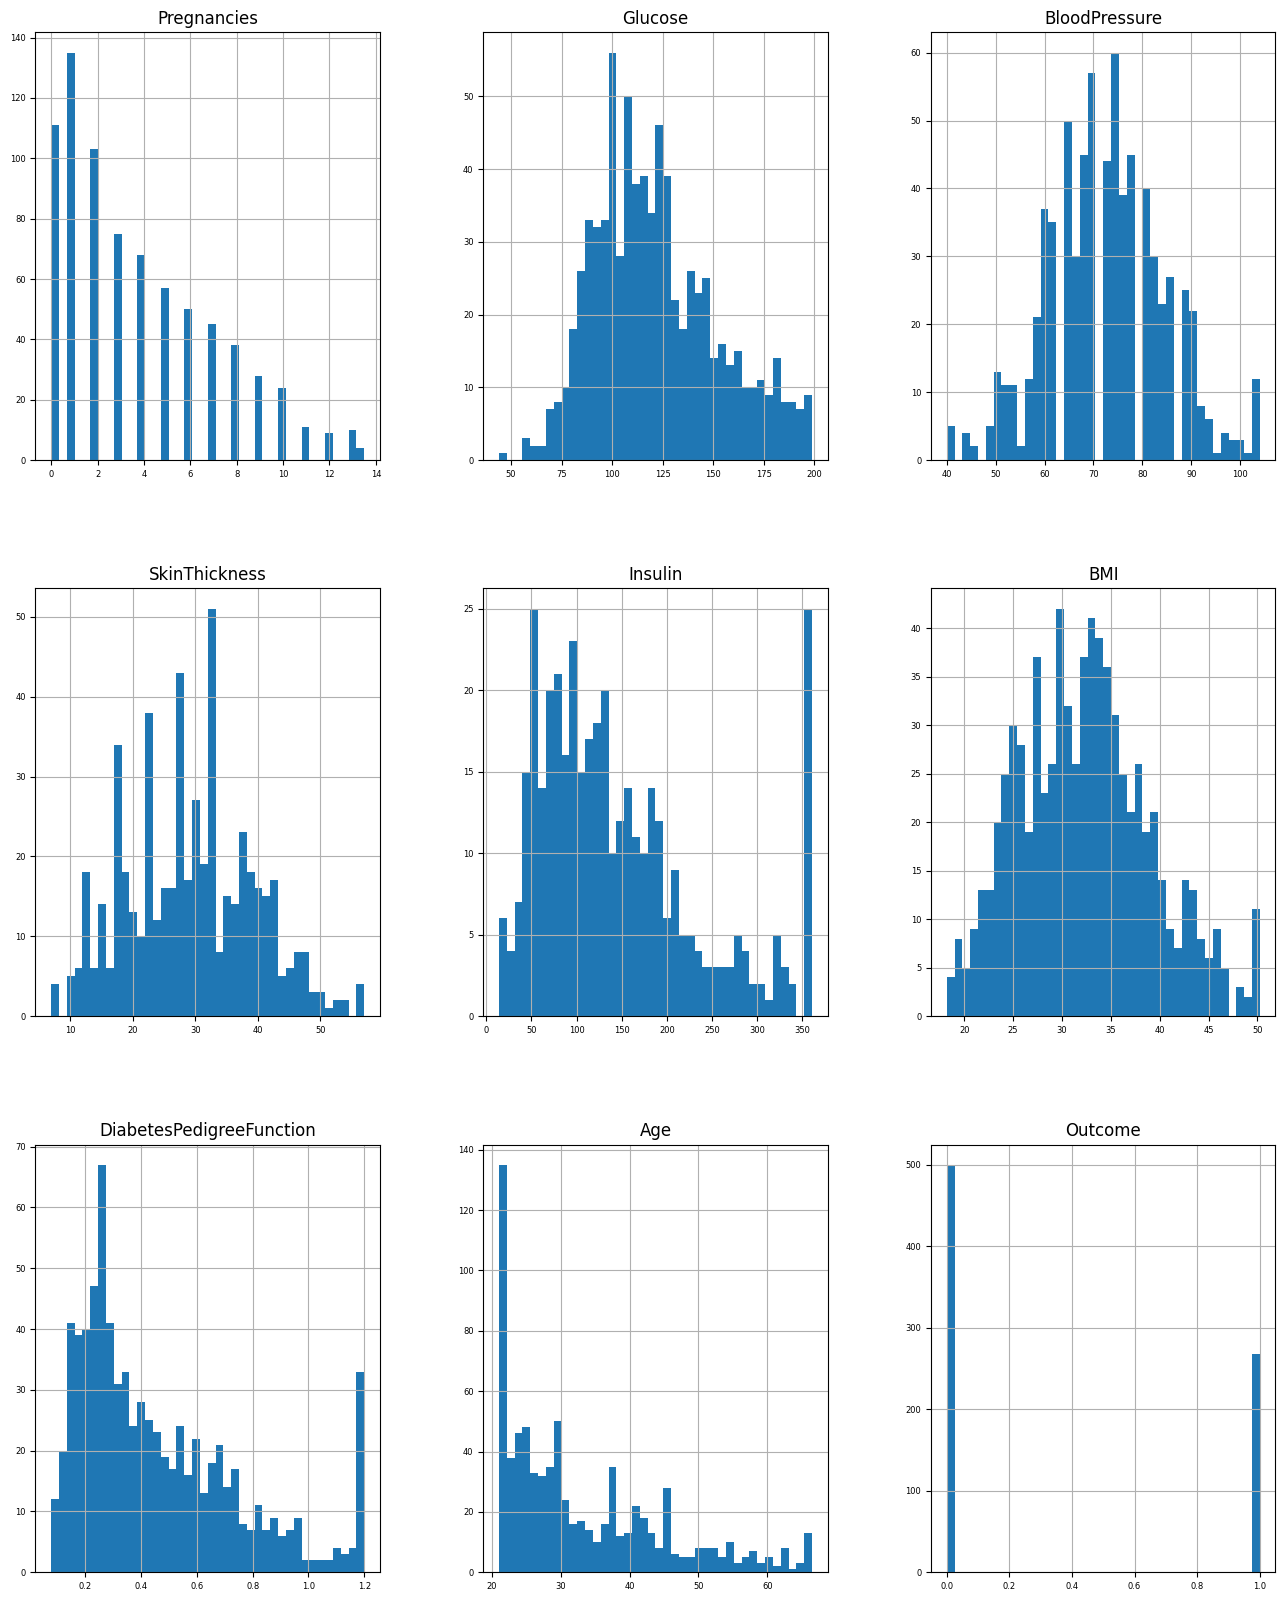

In [ ]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

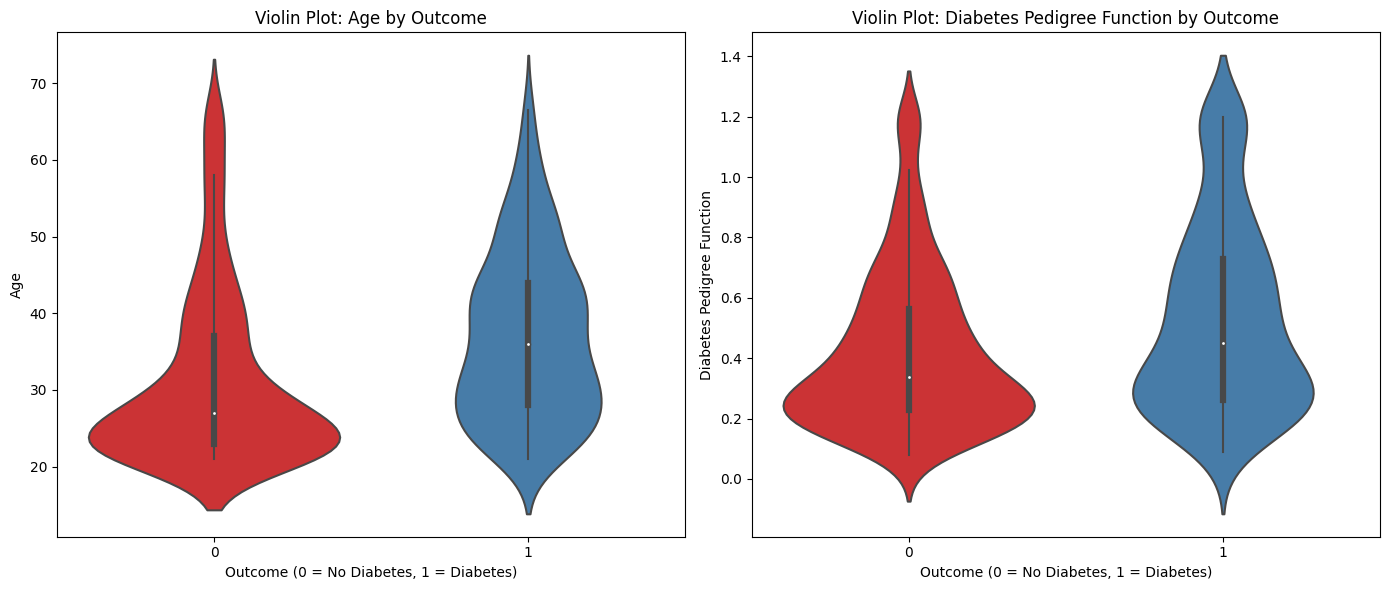

In [ ]:
# Create subplots with two violin plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Violin Plot 1: Age by Outcome (Diabetes vs. No Diabetes)
sns.violinplot(x='Outcome', y='Age', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Violin Plot: Age by Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Age')

# Violin Plot 2: Diabetes Pedigree Function by Outcome (Diabetes vs. No Diabetes)
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Violin Plot: Diabetes Pedigree Function by Outcome')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Diabetes Pedigree Function')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

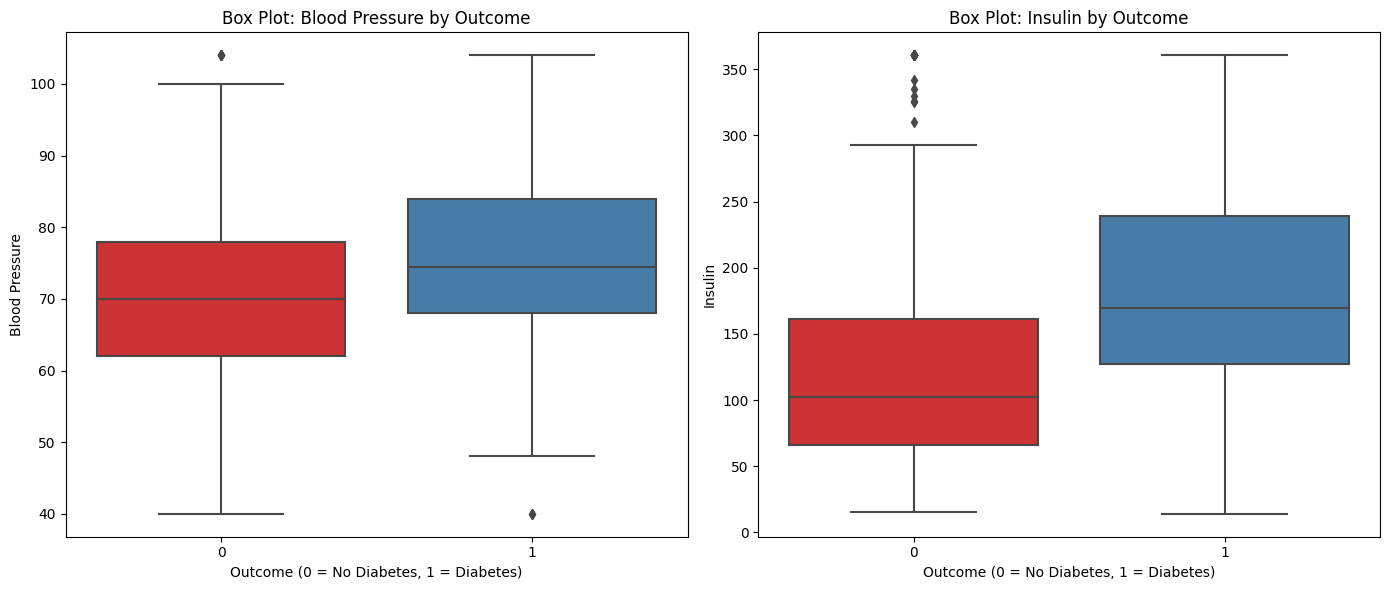

In [ ]:
# Create subplots with two box plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot 1: Blood Pressure by Outcome (Diabetes vs. No Diabetes)
sns.boxplot(x='Outcome', y='BloodPressure', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Box Plot: Blood Pressure by Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Blood Pressure')

# Box Plot 2: Insulin by Outcome (Diabetes vs. No Diabetes)
sns.boxplot(x='Outcome', y='Insulin', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Box Plot: Insulin by Outcome')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Insulin')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

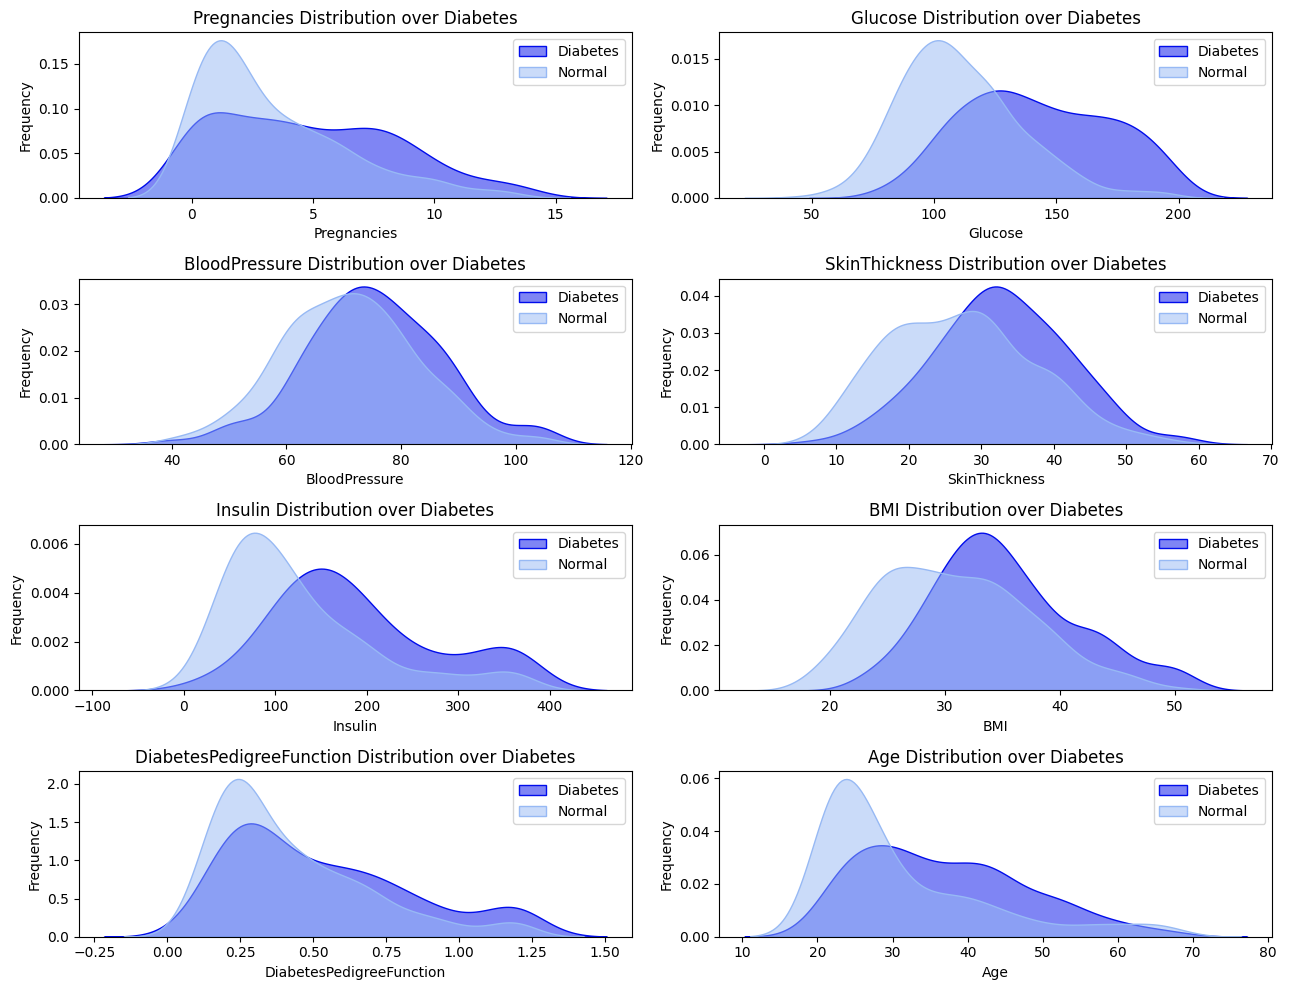

In [ ]:
fig, axes = plt.subplots(nrows=len(df.columns) // 2, ncols=2, figsize=(13, 10))

for idx, column in enumerate(df.drop(columns = 'Outcome')):
    row_idx = idx // 2
    col_idx = idx % 2

    sns.kdeplot(df[df["Outcome"] == 1][column], alpha=0.5, fill=True, color="#000CEB", label="Diabetes", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["Outcome"] == 0][column], alpha=0.5, fill=True, color="#97B9F4", label="Normal", ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Diabetes")
    axes[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

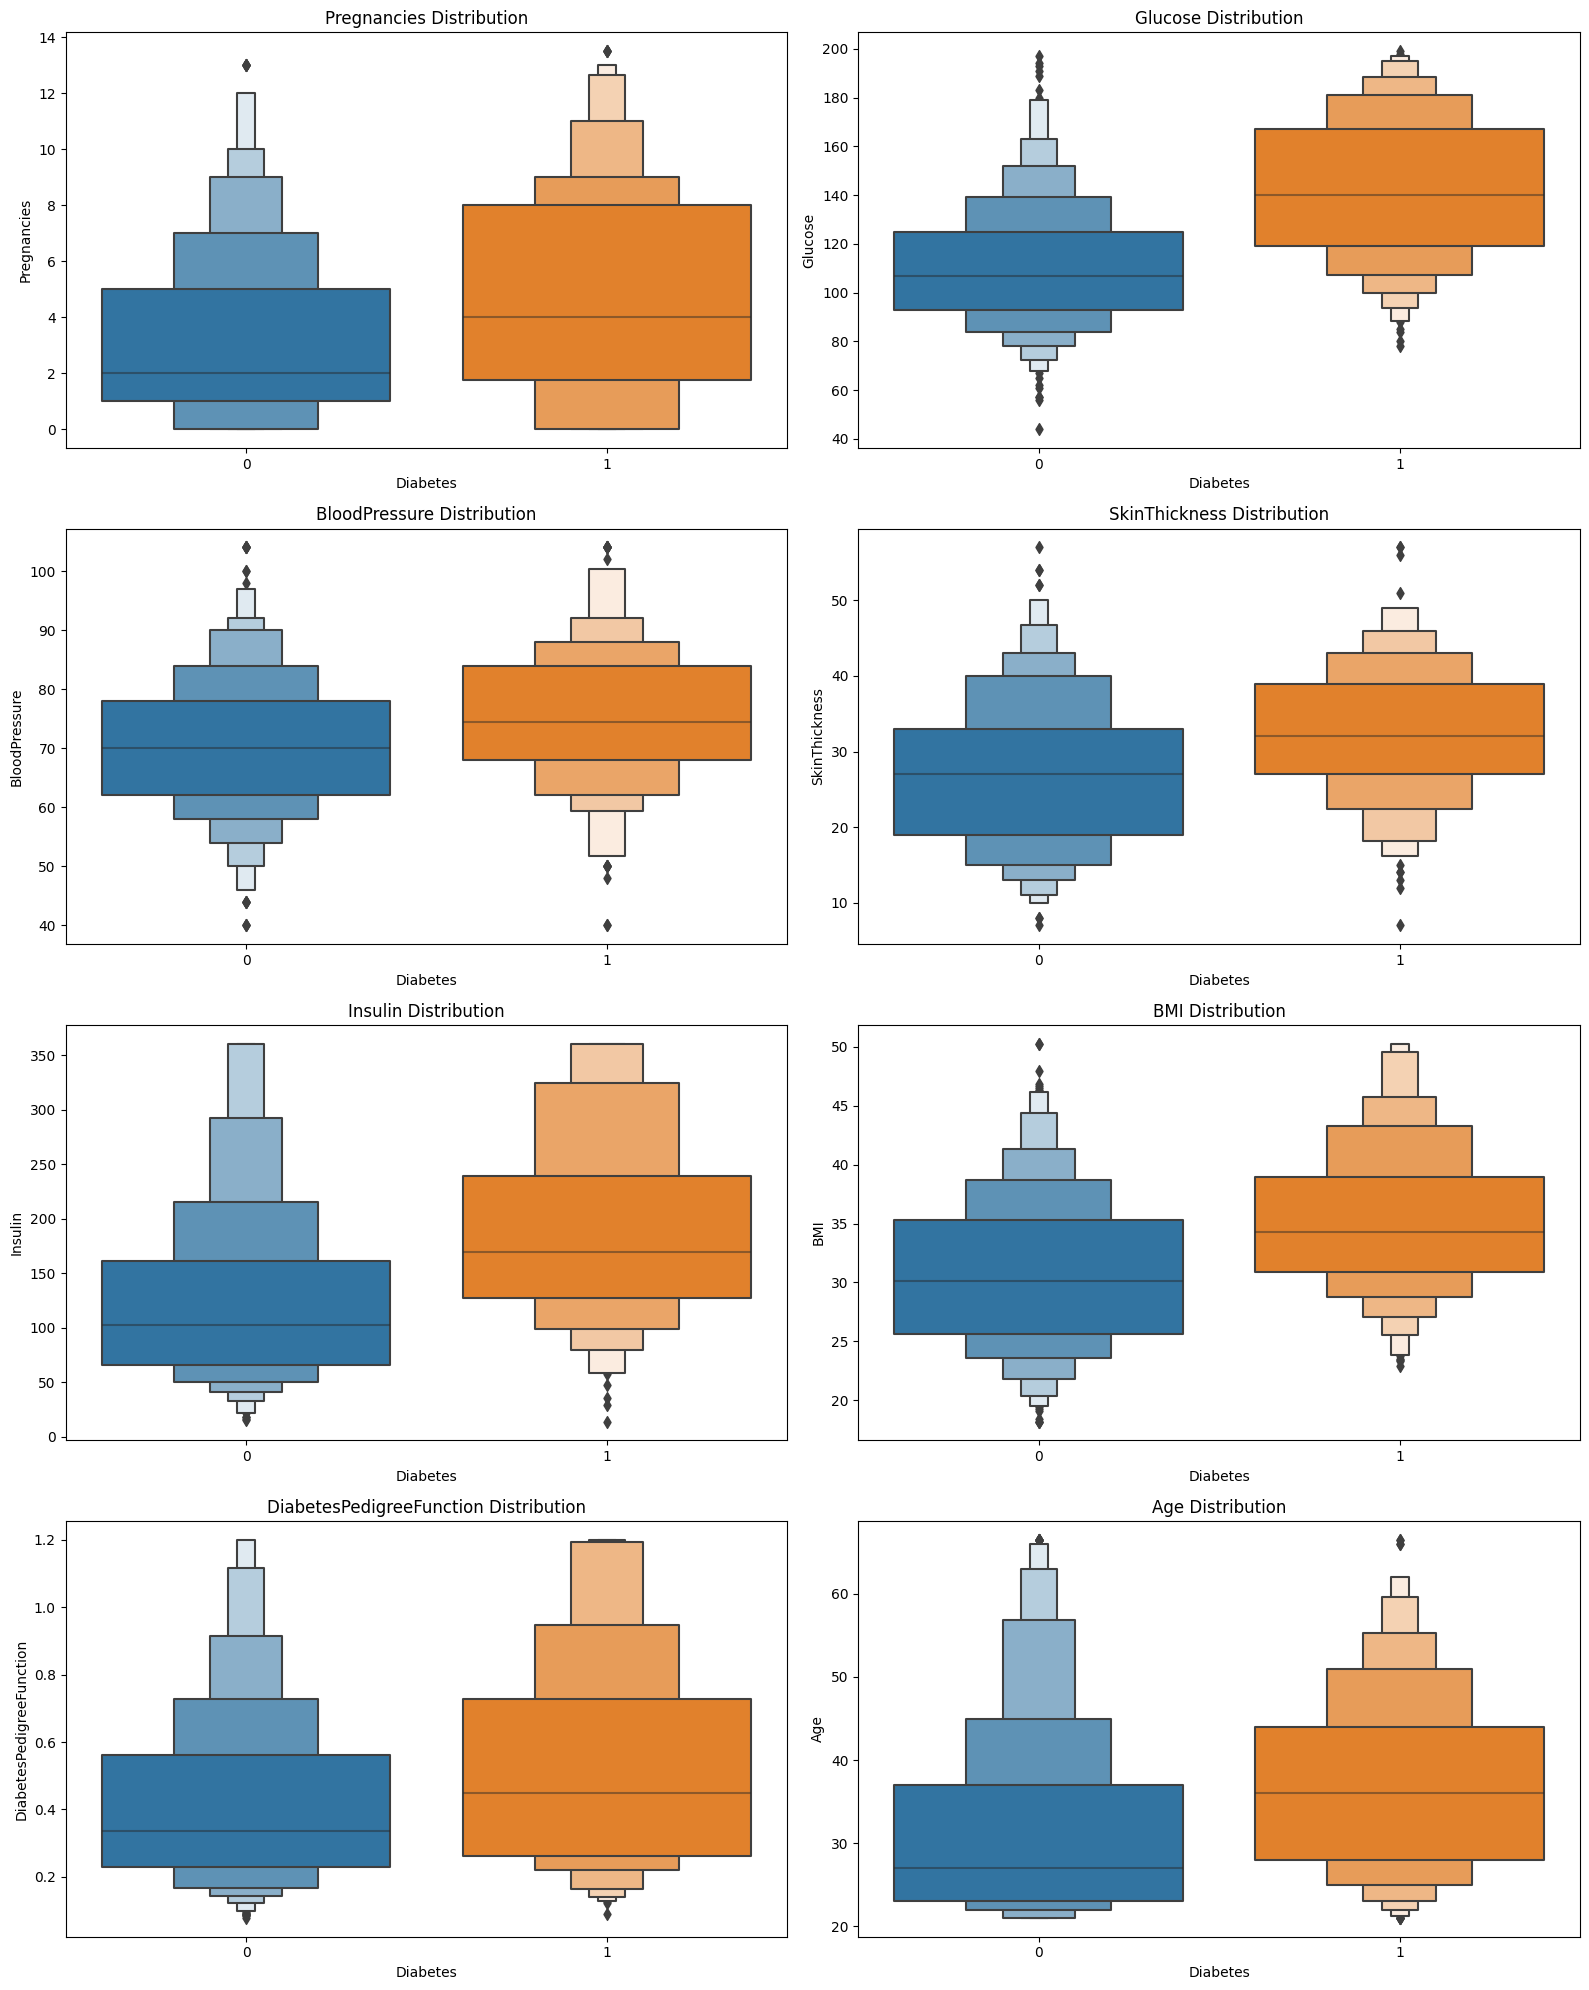

In [ ]:
fig, axes = plt.subplots(nrows=len(df.columns) // 2, ncols=2, figsize=(16, 20))

for idx, column in enumerate(df.drop(columns = 'Outcome')):
    row_idx = idx // 2
    col_idx = idx % 2

    sns.boxenplot( x='Outcome' , y= column , data=df, ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel("Diabetes")
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")

plt.tight_layout()
plt.show()

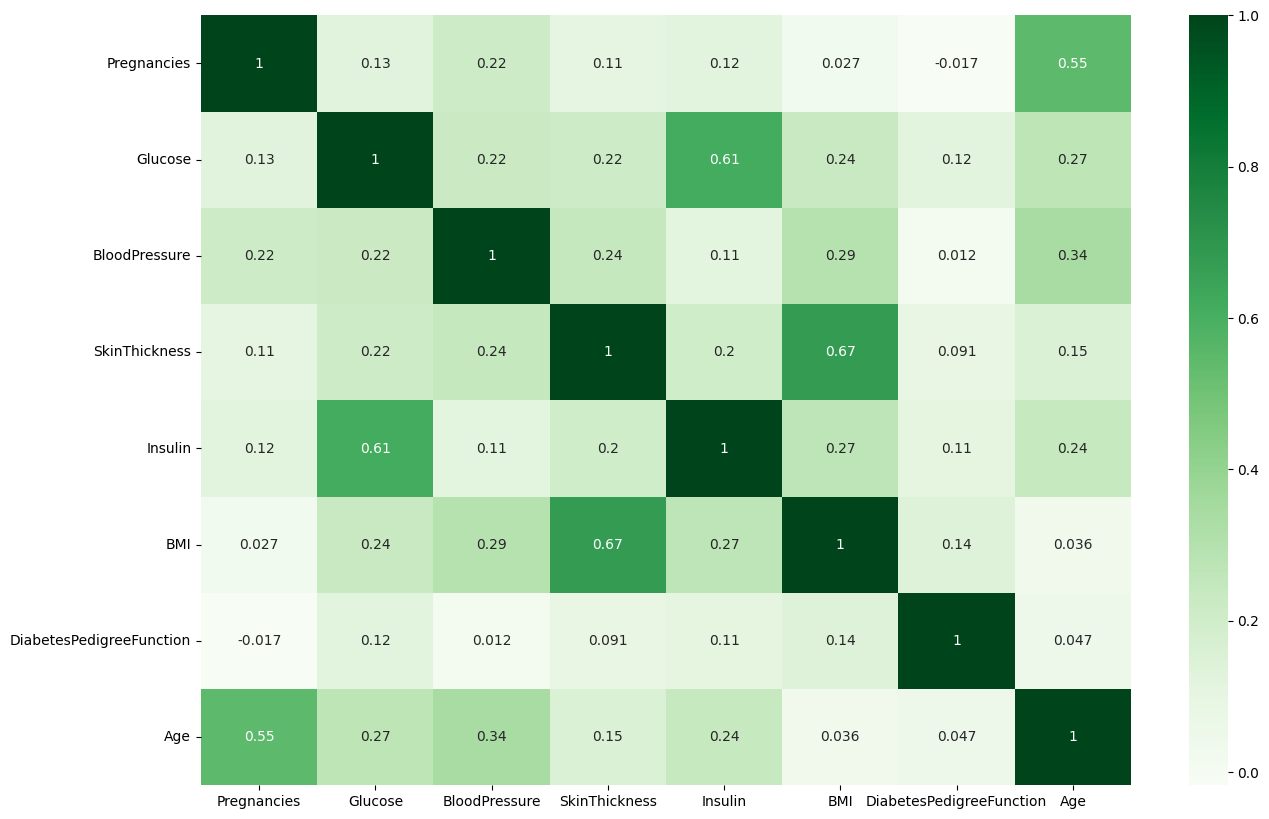

In [ ]:
corr = df.drop(columns= 'Outcome').corr()
fig , ax = plt.subplots(figsize=(15 , 10))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

<Axes: >

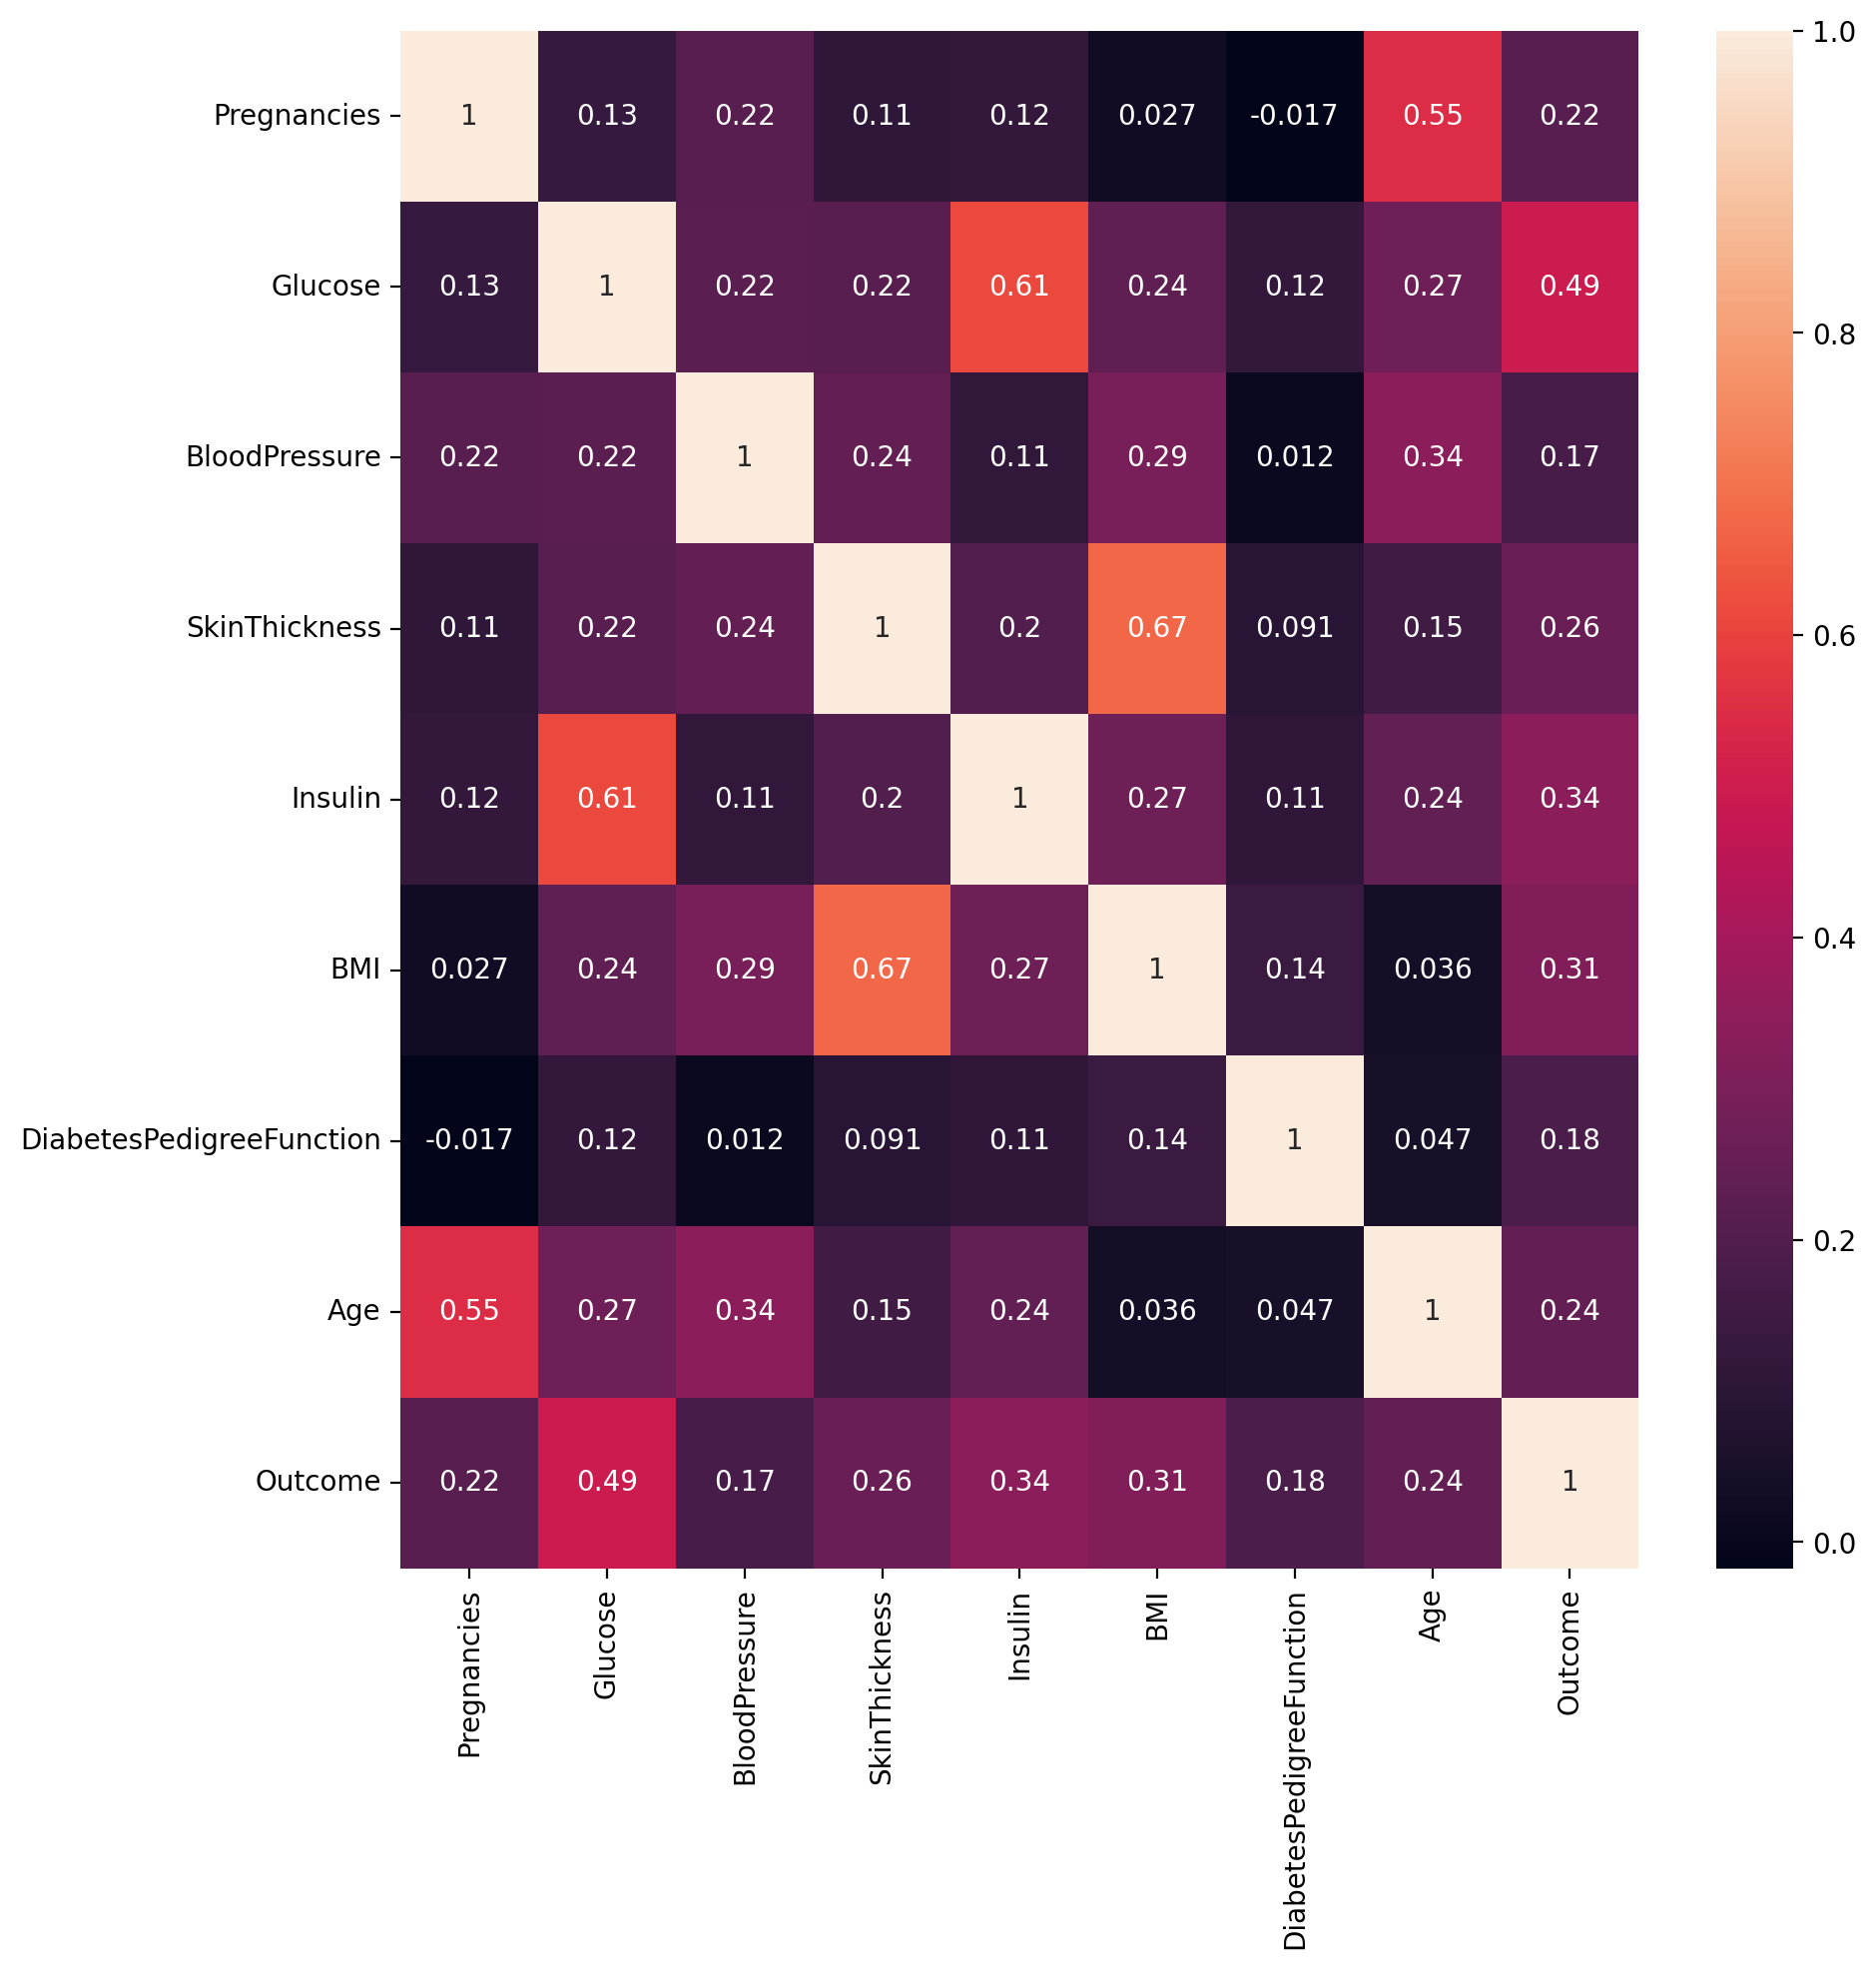

In [ ]:
plt.figure(figsize=(10,10),dpi=200)
sns.heatmap(df.corr(),annot=True)

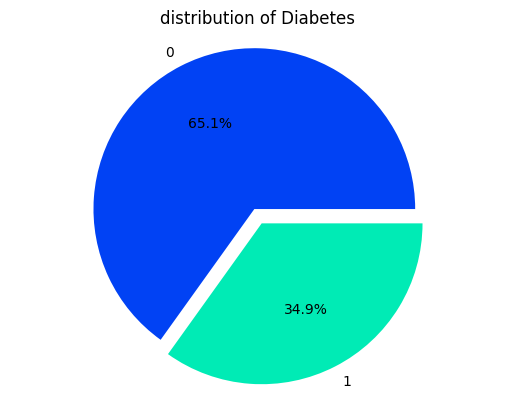

In [ ]:
Diabetes_column = df.Outcome.value_counts()

# pie chart for target column
plt.pie(Diabetes_column, labels = Diabetes_column.index, autopct="%1.1f%%", explode = [0,0.1], colors = ["#0142F4","#00EBB5"])
plt.title("distribution of Diabetes")
plt.axis("equal")
plt.show()

<Figure size 2000x1500 with 0 Axes>

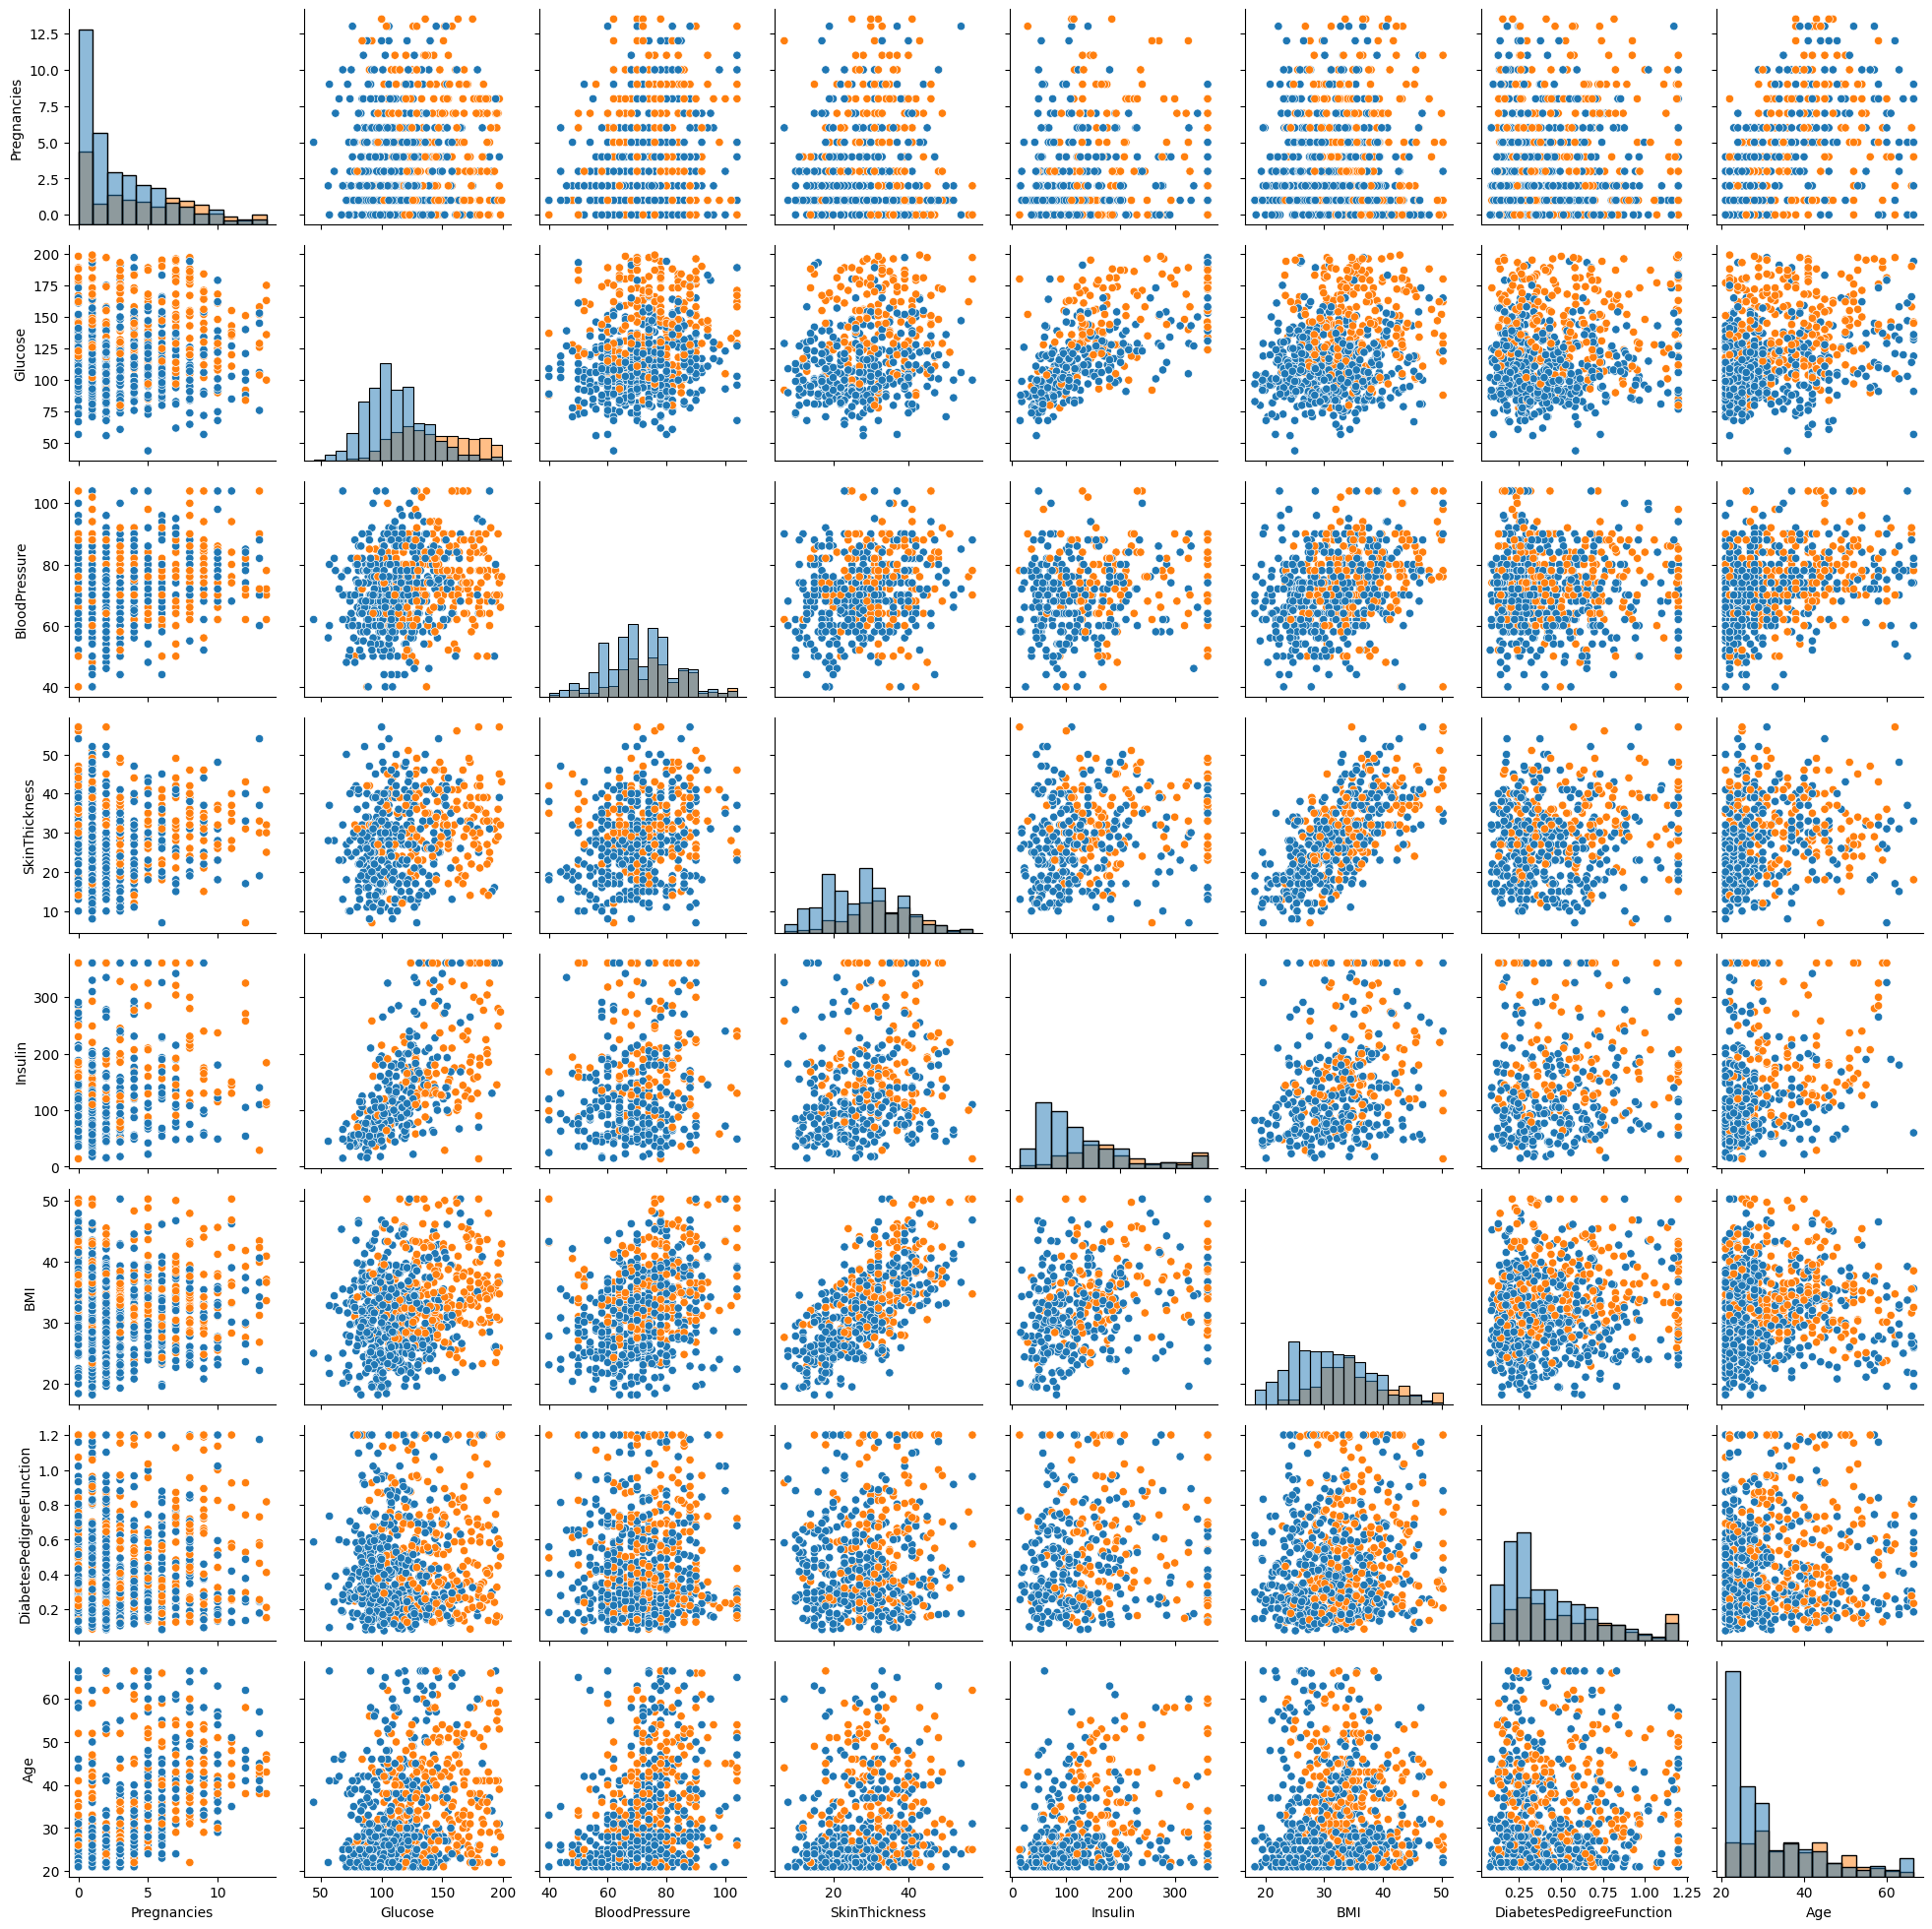

In [ ]:
plt.figure(figsize=(20,15))
g = sns.PairGrid(data = df,hue='Outcome')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

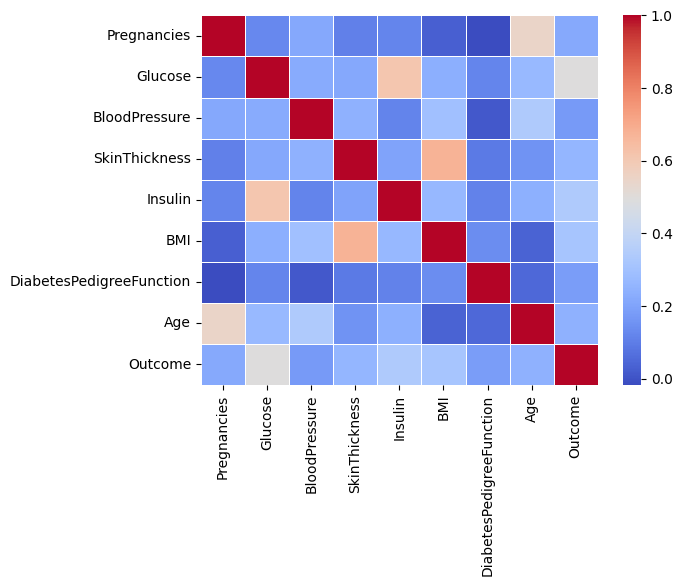

In [ ]:
corr = df.corr()
plt.figure() #plot the heatmap for the correlation
sns.heatmap(corr,fmt=".5f", linewidth=.5, cmap="coolwarm")
plt.show() #the more darker color the more stronger correlation.

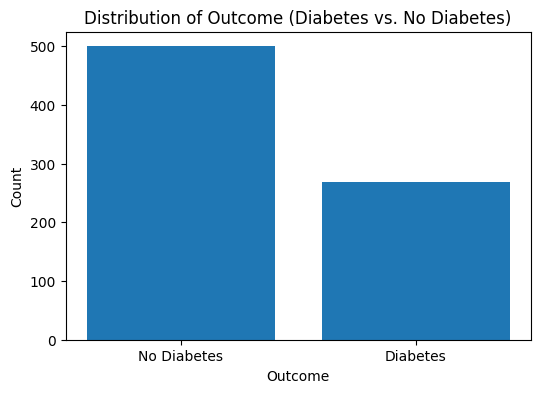

In [ ]:
# Count the occurrences of each outcome (0: No diabetes, 1: Diabetes)
outcome_counts = df['Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(outcome_counts.index, outcome_counts.values, tick_label=['No Diabetes', 'Diabetes'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome (Diabetes vs. No Diabetes)')

# Show the plot
plt.show()

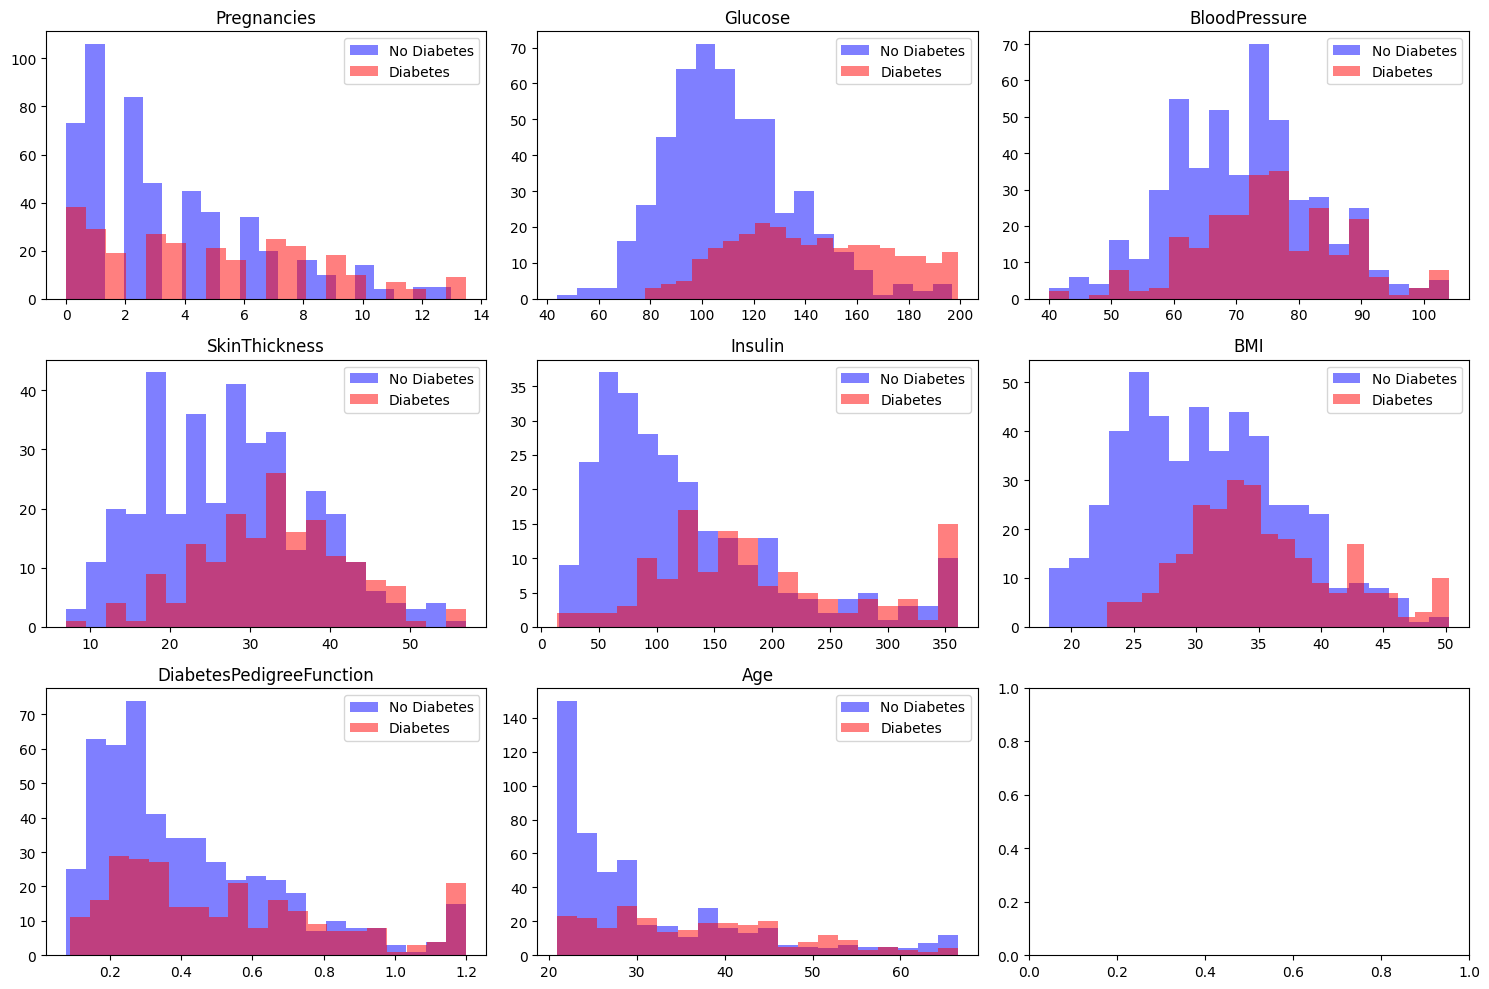

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Features to plot (excluding 'Outcome' which is the target variable)
features = df.columns[:-1]

# Plot histograms for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(df[df['Outcome'] == 0][feature], alpha=0.5, label='No Diabetes', color='blue', bins=20)
    ax.hist(df[df['Outcome'] == 1][feature], alpha=0.5, label='Diabetes', color='red', bins=20)
    ax.set_title(feature)
    ax.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

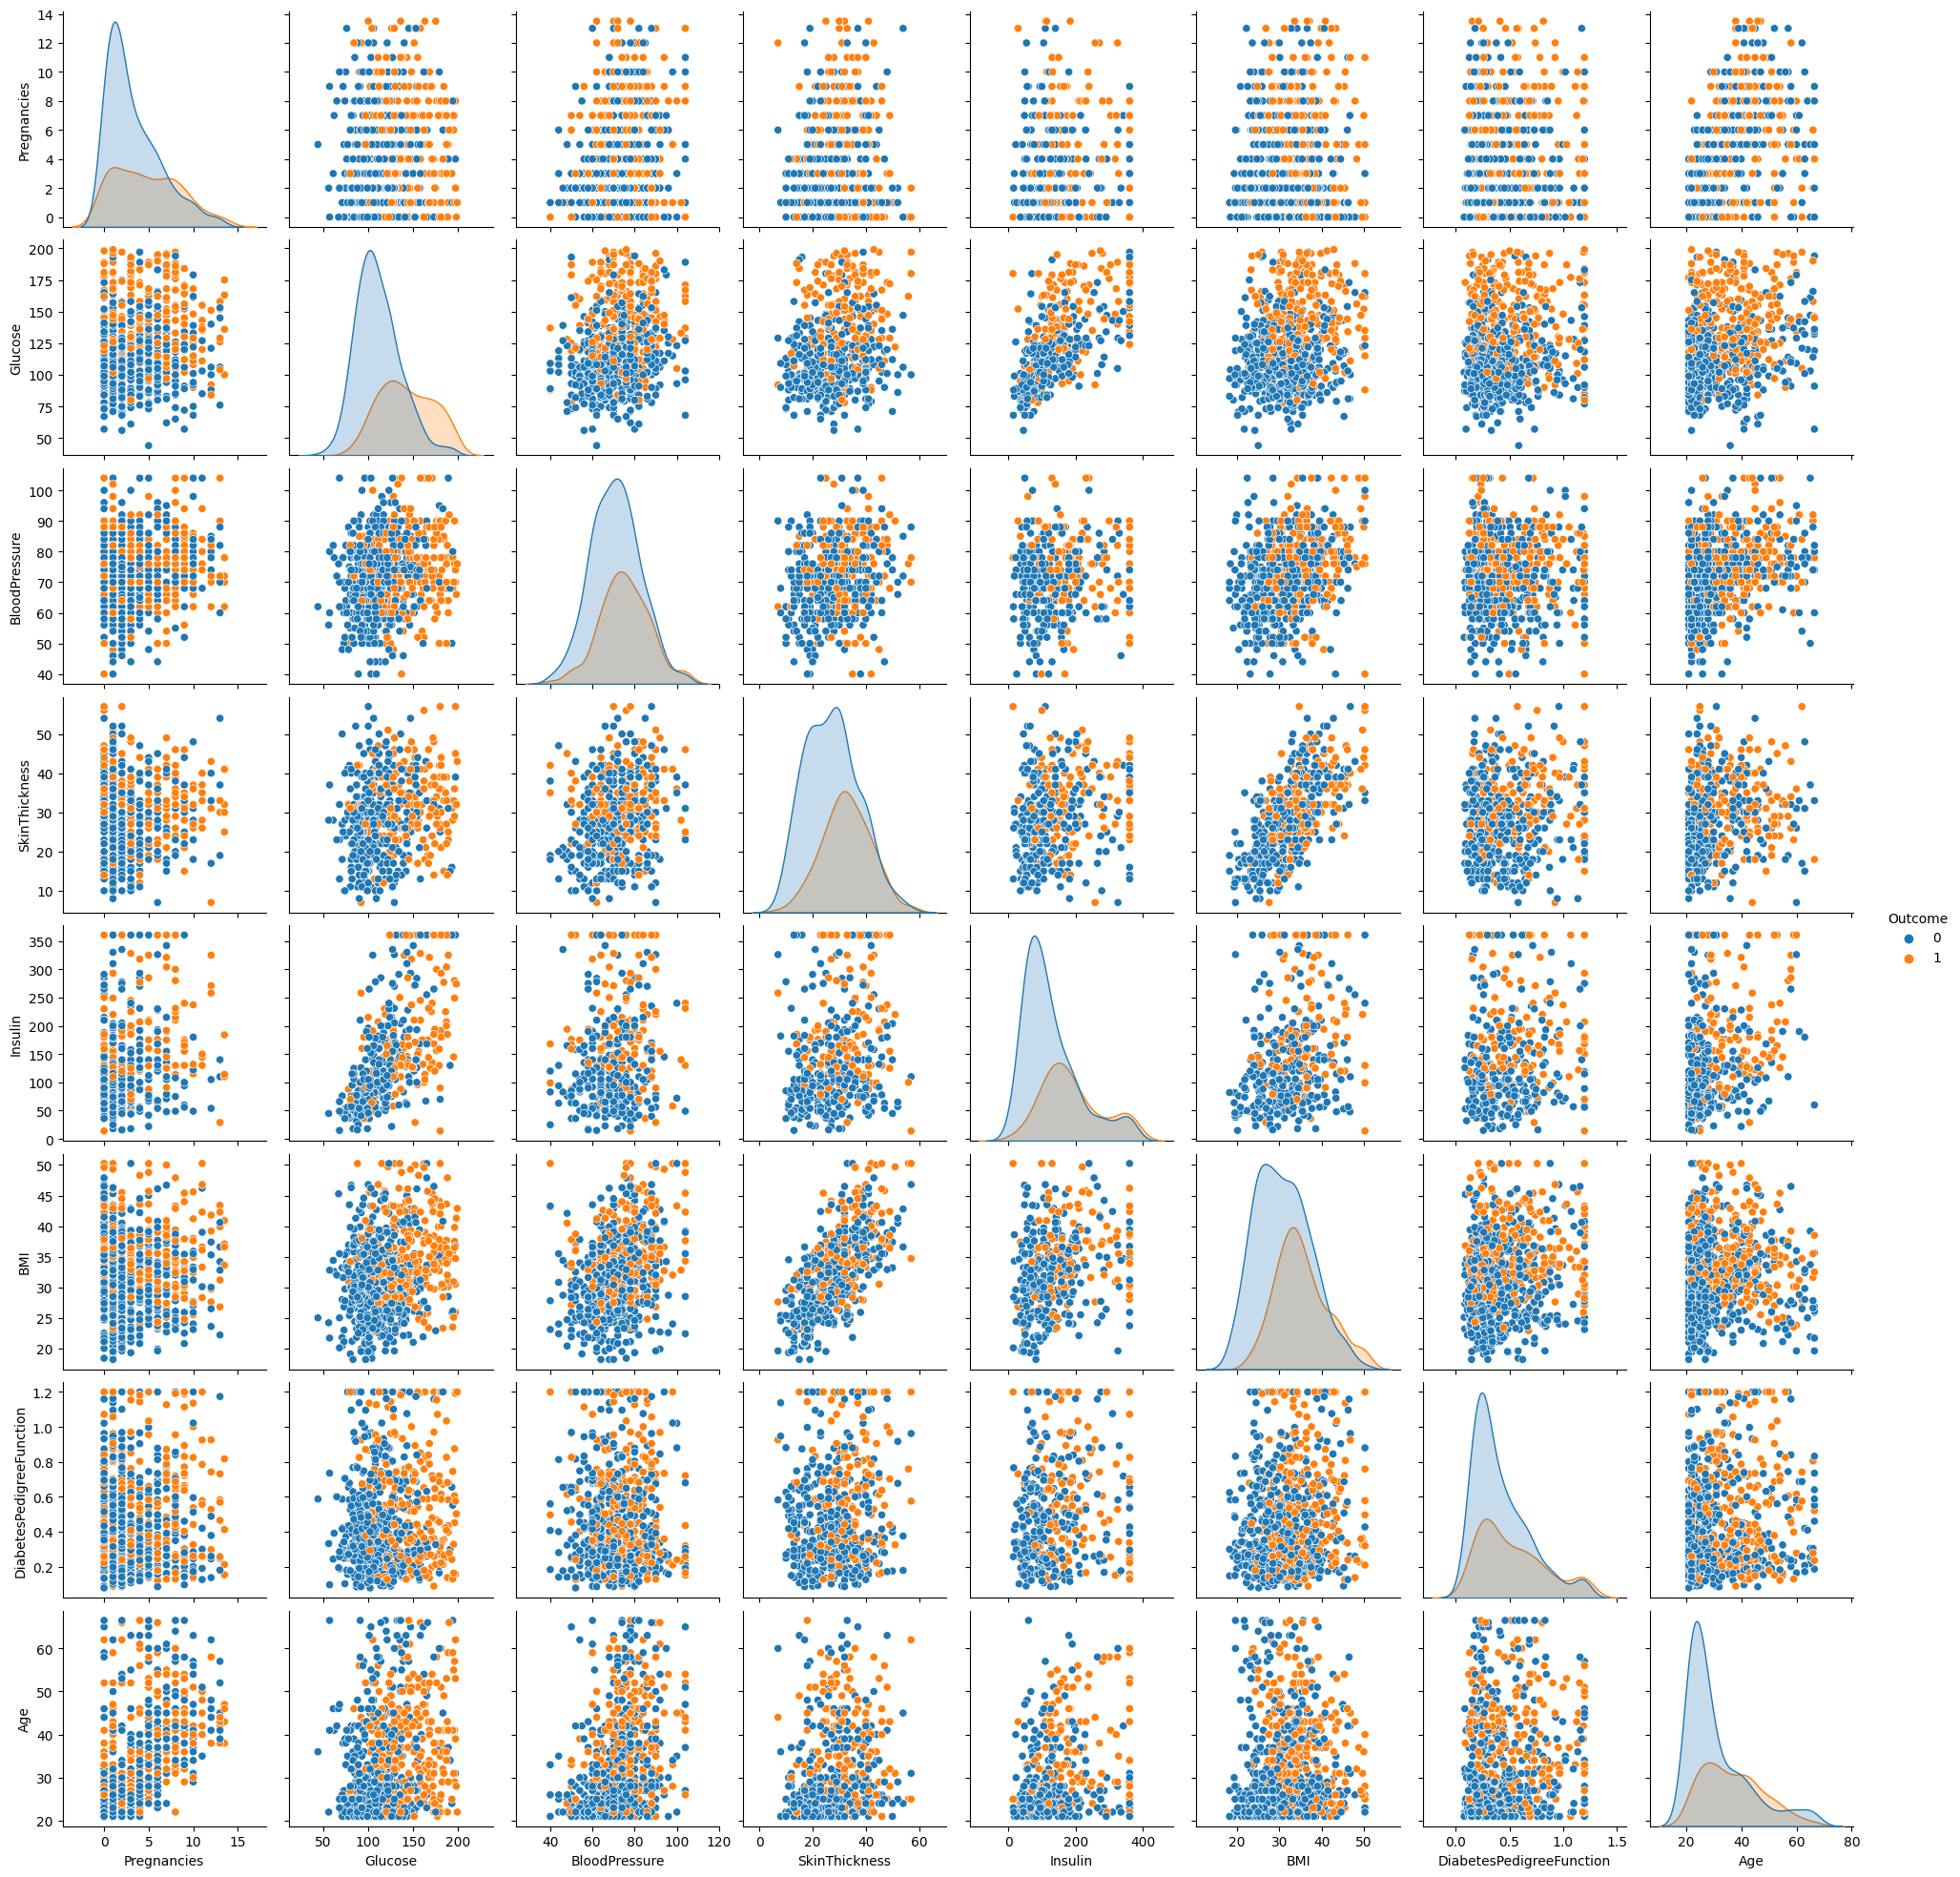

In [ ]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

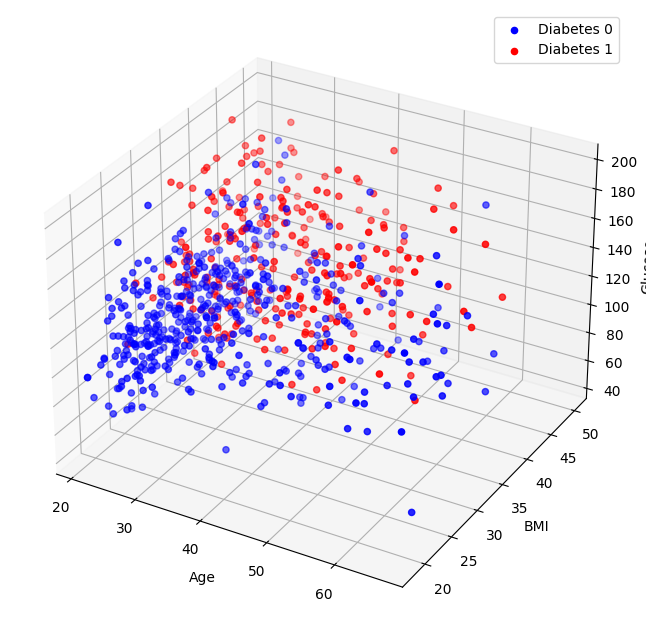

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for diabetes status (0 for No Diabetes, 1 for Diabetes)
colors = {0: 'blue', 1: 'red'}

# Scatter plot with Age on the x-axis, BMI on the y-axis, and Glucose on the z-axis
for outcome, color in colors.items():
    subset = df[df['Outcome'] == outcome]
    ax.scatter(subset['Age'], subset['BMI'], subset['Glucose'], c=color, label=f'Diabetes {outcome}')

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Glucose')

# Add a legend
ax.legend()

# Show the 3D scatter plot
plt.show()

# **Preprocessing**

In [ ]:
# Check for duplicates across all columns
duplicated = df.duplicated().sum()

# Print the number of duplicated instances
if duplicated == 0:
    print("Number of duplicated instances:", duplicated)
else:
# Print the duplicated instances
    print("Number of duplicated instances:", duplicated)
    print(df[duplicated])

Number of duplicated instances: 0


In [ ]:
# print the percentage of missing values for instances.
total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
percent = ((df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)[(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) != 0]) * 100
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing['Percent'] = missing['Percent'].apply(lambda x: "%.2f%%" % x)
print(missing)

               Total Percent
Insulin          374  48.70%
SkinThickness    227  29.56%
BloodPressure     35   4.56%
BMI               11   1.43%
Glucose            5   0.65%


In [ ]:
# Extract the features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X = df.drop(columns = 'Outcome')
target = df['Outcome']

X_train , X_test , y_train , y_test = train_test_split(X ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


In [ ]:
missing_values = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[missing_values] = np.where(df[missing_values] == 0, np.nan, df[missing_values])

# **Modeling**

In [ ]:
def train(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 42)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))


def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Greens',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [ ]:
def model_performance(model):
    y_pred = model.fit(X_train, y_train).predict(X_test)

    fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Confusion Matrix", "Metrics"))

    confusion = confusion_matrix(y_test, y_pred)
    tp = confusion[1,1]
    fn = confusion[1,0]
    fp = confusion[0,1]
    tn = confusion[0,0]
    accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    precision =  (tp/(tp+fp))
    recall    =  (tp/(tp+fn))
    f1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    colors = ['#93e4c1', '#3baea0', '#118a7e', '#1f6f78']

    show_metrics = pd.DataFrame(data=[[accuracy , precision, recall, f1_score]])
    show_metrics = show_metrics.T

    fig.add_trace(go.Heatmap(z = confusion  ,x = ["0 (pred)","1 (pred)"],
                         y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2,
                         colorscale="darkmint", showscale  = False),
                         row = 1, col = 1)
    for i in range(len(confusion)):
        for j in range(len(confusion[i])):
            fig.add_annotation(
            x=j,
            y=i,
            text=str(confusion[i][j]),
            showarrow=False,
            font=dict(color='black', size=15)
        )

    fig.add_trace(go.Bar(x = (show_metrics[0].values),
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'],
                    text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='white'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='white',width=1.5))), row = 1, col = 2)

    fig.update_layout(title={'text': model.__class__.__name__,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')

    iplot(fig)

# **Visualisasi Hasil Algoritma**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Check for scaling results
X_scaled_df = pd.DataFrame(X_scaled)

X_scaled_df.head()

0         1         2         3         4         5         6  \
0  0.647150  0.862287 -0.031356  0.591250       NaN  0.179589  0.588927   
1 -0.848970 -1.202229 -0.532817 -0.005887       NaN -0.863420 -0.378101   
2  1.245598  2.009241 -0.699970       NaN       NaN -1.355123  0.746595   
3 -0.848970 -1.071148 -0.532817 -0.603023 -0.581820 -0.639918 -1.022787   
4 -1.148194  0.501816 -2.705814  0.591250  0.238269  1.595100  2.596563   

          7  
0  1.445691  
1 -0.189304  
2 -0.103252  
3 -1.049828  
4 -0.017199

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    random_state=42, stratify=y)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_neighbors' : list(range(1,16)),
                  'leaf_size' : [30, 60, 100]
                 }

grid_search = GridSearchCV(knn_model, parameter_grid, cv=5)

print(f'Best Parameters are: {best_parameter}')
print(f'Best Score is: {best_score}')

Best Parameters are: {'leaf_size': 30, 'n_neighbors': 8}
Best Score is: 0.742782886845262


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Make a dictionary consist of model names and metrics
model_evaluation = {'Models' : [],
                    'Accuracy' : [],
                    'Precision' : [],
                    'Recall' : [],
                    'F1_score' : []
                   }

# Make a list of models and y_pred into predictions list
models = ['KNN']
predictions = [knn_predict]

# Iterate the model evaluation
for model_name, y_pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Insert scores into the 'model_evaluation' dictionary
    model_evaluation['Models'].append(model_name)
    model_evaluation['Accuracy'].append(accuracy)
    model_evaluation['Precision'].append(precision)
    model_evaluation['Recall'].append(recall)
    model_evaluation['F1_score'].append(f1)

# Convert dictionary into a DataFrame
metrics_table = pd.DataFrame(model_evaluation)
metrics_table.set_index('Models', inplace=True)

metrics_table

Accuracy  Precision    Recall  F1_score
Models                                         
KNN     0.571429      0.375  0.333333  0.352941

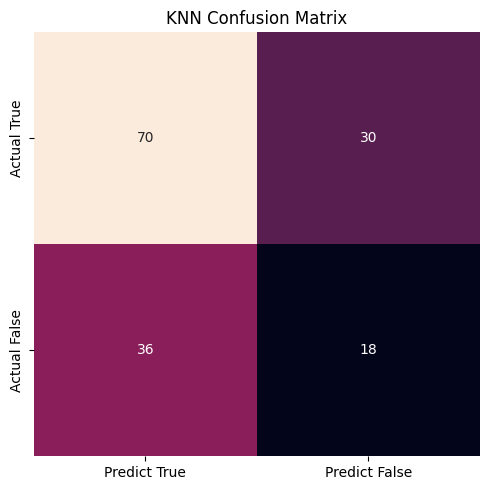

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, knn_predict)
cmf = pd.DataFrame(matrix, index=['Actual True', 'Actual False'],
                   columns=['Predict True', 'Predict False'])

fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(data=cmf, cmap='rocket', annot=True, cbar=None)
plt.title("KNN Confusion Matrix")
plt.tight_layout()
plt.show()

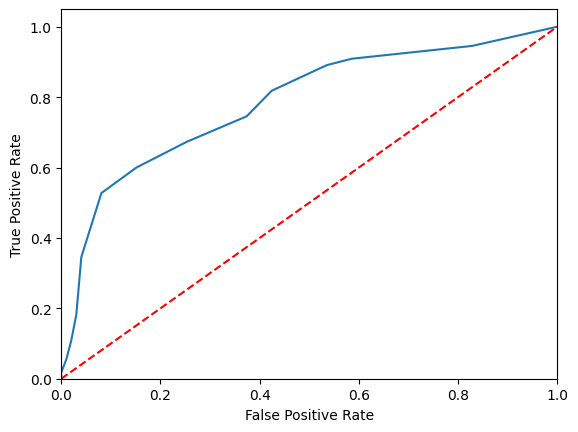

In [ ]:
model_roc_auc = roc_auc_score(y_test, knn_predict)

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
##Splitting to training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
print(X_train.shape)
print(y_test.shape)

(460, 8)
(308,)


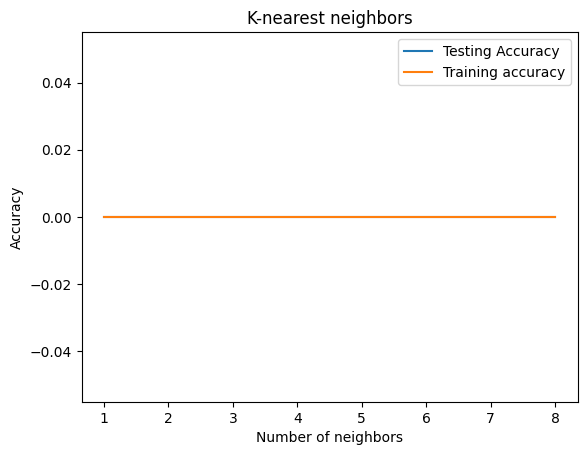

In [ ]:
plt.title('K-nearest neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# **Save Model**

In [ ]:
# Define a filename for the pickle file
filename = 'knn.sav'

# Pickle (serialize) the model to a file
with open(filename, 'wb') as file:
    pickle.dump(knn,file)

NameError: name 'pickle' is not defined